# Mandelbrot orbits


- we will write software to display orbits.

In [67]:
# load some libraries and library function.

import numpy as np
import matplotlib.pyplot as plt

# Jupyter "magic command".
%matplotlib inline

# set up some properties for all figures.
plt.rcParams['figure.figsize'] = [3, 3]
plt.rcParams['figure.dpi'] = 200

In [132]:
# set up the picture (axes).
# I want it to have a certain square size. 
# It needs to fit the unit circle and the mandelbrot circle.
# A bit bigger because I want to see the points that go outside

# alpha is transparency.

def axis_setup(ax):
    picture_limit = 4
    ax.set_aspect('equal')
    ax.axhline(y=0, color='gray', alpha=0.3)
    ax.axvline(x=0, color='gray', alpha=0.3)
    ax.axis('off') # turn off x-y axis numbers, ticks...
    # set dimensions.
    ax.set_xlim(-picture_limit, picture_limit)
    ax.set_ylim(-picture_limit, picture_limit)
    
def plot_unit_circle(ax):
    # from 0 to 2*pi
    theta = np.linspace(0, 2*np.pi, 100)
    xs = np.cos(theta)
    ys = np.sin(theta)
    ax.plot(xs, ys, lw=1, color='green', alpha=0.4)
    
def plot_mandelbrot_circle(ax):
    # from 0 to 2*pi
    theta = np.linspace(0, 2*np.pi, 100)
    xs = 2*np.cos(theta)
    ys = 2*np.sin(theta)
    ax.plot(xs, ys, lw=1, color='red', alpha=0.4)

# Break tasks into many small functions.   
# z_2 = z_1**2 + c.

def compute_orbit(N, c):
    orbit = []
    z = 0+0j               # All orbits begin here.
    for _ in range(N):
        orbit.append(z)
        z = z**2 + c       # new z is old z **2 + c
    return orbit
    
# Plot the orbit onto ax.    

# Draw the points of the orbit onto the axes ax.
# Python cannot (afaik) plot complex numbers directly.
# What we have to do is separate into real and imaginary parts
# and plot those. It expects (x,y) not z. 
def plot_orbit(ax, orbit):
    xs = np.real(orbit)
    ys = np.imag(orbit)
    ax.scatter(xs, ys, s=2, color='black', alpha=0.6)
    
    # Create list of labels. Attach a label 0, 1, 2...
    # to each orbit point.
    # jiggle them a bit so the labels are not on top of 
    # the orbit points.
    for i,label in enumerate([str(u) for u in range(len(orbit))]):
        z = orbit[i]
        
        # jiggling.
        if np.abs(z) == 0:
            z += 0.15
        else:
            z += 0.25 * z/np.abs(z)
        
        x = np.real(z)
        y = np.imag(z)
        # ax.annotate(label, (x, y), fontsize=5, ha='center', va='center')
    

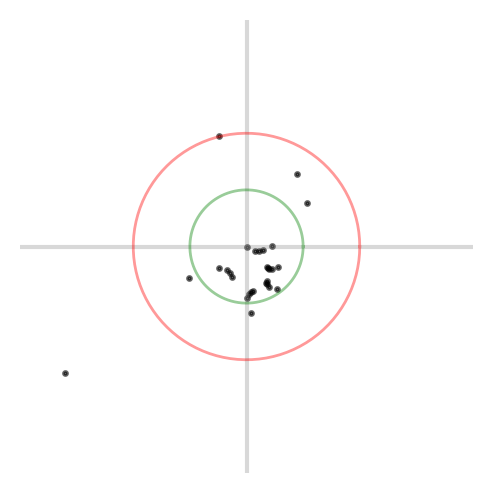

In [133]:
orbit = compute_orbit(29, (1-1j)/2.8)

fig, ax = plt.subplots() 
axis_setup(ax)
plot_unit_circle(ax)
plot_mandelbrot_circle(ax)
plot_orbit(ax, orbit)

In [73]:
# list. Data structure.

orbit = []
orbit.append(0+0j)
orbit.append(3-2j)


In [75]:
for _ in range(10):
    orbit.append(88)

In [76]:
orbit

[0j, (3-2j), 88, 88, 88, 88, 88, 88, 88, 88, 88, 88]

In [80]:
np.real(compute_orbit(10, (1-1j)/3))

array([ 0.        ,  0.33333333,  0.33333333,  0.13580247, -0.14342326,
        0.0788424 ,  0.3060996 ,  0.29586117,  0.11278087, -0.0918892 ])